# Проект по распознаванию гласных языка акебу (семья ква)
*(сходный проект может быть разработан для любого малоописанного языка с богатой системой гласных)*


1) Описание цели проекта

*Определение бизнес-цели*: создание программы, распознающей гласные языка акебу по первым двум резонансным частотам, или формантам, F1 и F2, ширине полосы первой форманты (B1) и разности амплитуд первых двух формант (Spectral Slope, или A1-A2)

*Оценка текущей ситуации*: данная программа была бы исключительно востребованной среди исследователей языка акебу, не являющихся специалистами по инструментальной фонетике и занимающихся описанием различных фрагментов грамматики в области морфологии и синтаксиса, а также созданием словаря, сбором и глоссированием естественных текстов на языке, созданием корпусов. Такая востребованность связана с тем, что язык акебу имеет богатую систему гласных /i, e, ɪ, ɛ, ɨ, ə, a, u, o, ʊ, ɔ/, противопоставленных по признакам подъема, ряда и продвинутости корня языка (Avanced Tongue Root, или [ATR]). Фонетическая реализация последнего из этих признаков с трудом улавливается на слух носителями европейских языков, а также не может быть с легкостью определена при помощи спектрограммы. Это вызывает огромные затруднения в распознавании фонологического облика слова. Создание подобной программы позволит разделить задачи исследования и описания языка между специалистами в различных областях лингвистики и сделать существенно более эффективной задачу документации языка.

Существуют определенные риски, связанные, с недоизученностью акустических коррелятов признака [ATR], с одной стороны, и близостью акустических эффектов при различных артикуляциях - с другой.

Так, первая форманта (F1) является единственным надеждным коррелятом признака [ATR]: F1(+ATR) < F1(-ATR). В то же время F1 является одновременно акустическим коррелятом признака подъема, из-за чего множества значений F1 (см. графики ниже) некоторых гласных могут существенно пересекаться. В особенности это касается верхних гласных [-ATR] и средних гласных [+ATR]: /ɪ/ vs. /e/, /ʊ/ vs. /o/. 

С другой стороны, вторичные акустические корреляты признака продвинутости корня языка, такие как ширина полосы первой форманты (B1) и разность амплитуд первых двух формант (A1-A2) надежно различают только часть гласных части носителей. В целом ожидаются следующие закономерности:
B1(+ATR) < B1(-ATR); A1-A2(+ATR) > A1-A2(-ATR).

В связи с этим результаты классификации необходимо оценивать в соответствии с правилами гармонии гласных и в случае конфликта принимать решение на основе как фонологических, так и морфонологических данных.

*Цель анализа данных* заключается в том, чтобы по значениям F1, F2 и B1 в Гц и A1-A2 в дБ, которые пользователь будет извлекать при помощи программы акустического анализа речи (например, Praat) и вводить в программе, программа определяла качество гласного.  


2) Описание данных. 

В работе используются данные, собранные в ходе полевой работы в деревне Джон префектуры Акебу республики Того в январе-феврале 2019 года.
Данные для исследования были собраны от шести информантов мужского пола: Achille Djenou (AD, 22 года), Yao Lolonyo Akossu (AK, 51 год), Koffi German Boukate (BOUK, 60 лет), Kokou Mawuwodo (Honoré) Kokoroko (HO, 22 года), Kokouvi Kpoliatowou (Martin) Kodjovi (MA, 32 года), Yaovi Modeste Tchitche (YT, 27 лет). 
Информантам предлагалось произнести слова из списка, включавшего 10 слов с каждым из 11 гласных языка акебу. Каждым из информантов было записано по 30 произнесений каждого из 11 гласных, что дало с учетом отбраковки около 1 процента произнесений 1955 произнесений: 10 слов * 3 повторения * 11 гласных * 6 информантов – 25.

Разметка гласных и измерения акустических параметров осуществлялись при помощи компьютерной программы анализа речи Praat. Измерение параметров осуществлялось на центральном отрезке гласного, составляющем 40% от его общей длительности. 

Значения двух первых формант были предварительно нормализованы по методу Т. Нири (Nearey, 1978, 138) с использованием формулы CLIH 2 (constant log interval hypothesis) с целью нивелировать рост частоты по логарифмической шкале и различия между информантами. Значения категориальных переменных заранее закодированы числовыми значениями:

Vowel: a - 0, i -1, ɪ - 2, e - 3, ɛ - 4, ɨ - 5, ə - 6, u - 7, ʊ - 8, o - 9, ɔ - 10;

SPKR: HO - 0, YT - 1, AD - 2, AK - 3, BO - 4, MA - 5.


3) Предварительная обработка данных

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [4]:
vowels = pd.read_csv('/content/gdrive/My Drive/Python/IAR_Makeeva/Dataset_Akebu.csv', sep=';', encoding='utf8')
vowels.head()

,SPKR,F1,F2,Spectral Slope,B1,Vowel
0,1,-0.5706,0.4123,-0.3206,-35.5424,1
1,1,-0.5346,0.4186,-2.6296,-28.4776,1
2,1,-0.3870,0.4186,4.6071,-13.8892,1
3,1,-0.5379,0.4276,-4.9570,-35.3992,1
4,1,-0.5363,0.4432,-4.3783,-24.6520,1


*Выявление количества пропущенных значений и их замена на медианные значения переменных*

In [5]:
vowels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955 entries, 0 to 1954
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SPKR            1955 non-null   int64  
 1   F1              1955 non-null   float64
 2   F2              1955 non-null   float64
 3   Spectral Slope  1954 non-null   float64
 4   B1              1881 non-null   float64
 5   Vowel           1955 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 91.8 KB


In [7]:
for col in vowels.columns:
  pct_missing = np.mean(vowels[col].isnull())
  print('{} - {}%'.format(col, round(pct_missing*100)))

SPKR - 0%
F1 - 0%
F2 - 0%
Spectral Slope - 0%
B1 - 4%
Vowel - 0%


In [8]:
medB = vowels['B1'].median()
vowels['B1'] = vowels['B1'].fillna(medB)

In [9]:
medS = vowels['Spectral Slope'].median()
vowels['Spectral Slope'] = vowels['Spectral Slope'].fillna(medS)

In [10]:
vowels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955 entries, 0 to 1954
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SPKR            1955 non-null   int64  
 1   F1              1955 non-null   float64
 2   F2              1955 non-null   float64
 3   Spectral Slope  1955 non-null   float64
 4   B1              1955 non-null   float64
 5   Vowel           1955 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 91.8 KB


*Визуализация данных*

Поскольку данных очень много, продемонстрируем здесь только часть графиков. 
Построим два графика:

а) так называемую формантную картину гласных, построенную на основе двух параметров - первой и второй формант;

б) график зависимости ширины полосы первой форманты (B1) от величины первой форманты (F1).
Оба графика построим сначала, не проводя различий между информантами.

In [11]:
vow_0 = vowels[vowels['Vowel'] == 0]
vow_1 = vowels[vowels['Vowel'] == 1]
vow_2 = vowels[vowels['Vowel'] == 2]
vow_3 = vowels[vowels['Vowel'] == 3]
vow_4 = vowels[vowels['Vowel'] == 4]
vow_5 = vowels[vowels['Vowel'] == 5]
vow_6 = vowels[vowels['Vowel'] == 6]
vow_7 = vowels[vowels['Vowel'] == 7]
vow_8 = vowels[vowels['Vowel'] == 8]
vow_9 = vowels[vowels['Vowel'] == 9]
vow_10 = vowels[vowels['Vowel'] == 10]

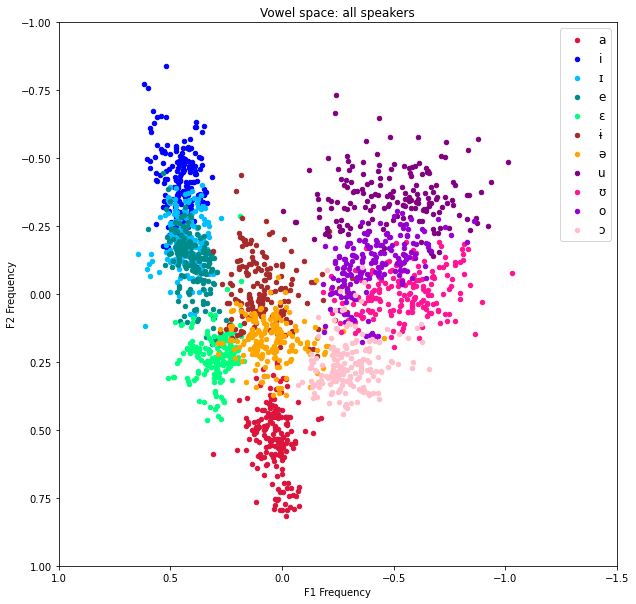

In [12]:
plt.figure(figsize=(10,10))
plt_0 = plt.scatter(vow_0['F2'], vow_0['F1'], s = 20, marker = 'o', c = 'crimson',
label = 'a', )
plt_1 = plt.scatter(vow_1['F2'], vow_1['F1'], s = 20, marker = 'o', c = 'blue',
label = 'i')
plt_2 = plt.scatter(vow_2['F2'], vow_2['F1'], s = 20, marker = 'o', c = 'deepskyblue',
label = 'ɪ')
plt_3 = plt.scatter(vow_3['F2'], vow_3['F1'], s = 20, marker = 'o', c = 'darkcyan',
label = 'e')
plt_4 = plt.scatter(vow_4['F2'], vow_4['F1'], s = 20, marker = 'o', c = 'springgreen',
label = 'ɛ')
plt_5 = plt.scatter(vow_5['F2'], vow_5['F1'], s = 20, marker = 'o', c = 'brown',
label = 'ɨ')
plt_6 = plt.scatter(vow_6['F2'], vow_6['F1'], s = 20, marker = 'o', c = 'orange',
label = 'ə')
plt_7 = plt.scatter(vow_7['F2'], vow_7['F1'], s = 20, marker = 'o', c = 'purple',
label = 'u')
plt_8 = plt.scatter(vow_8['F2'], vow_8['F1'], s = 20, marker = 'o', c = 'deeppink',
label = 'ʊ')
plt_9 = plt.scatter(vow_9['F2'], vow_9['F1'], s = 20, marker = 'o', c = 'darkviolet',
label = 'o')
plt_10 = plt.scatter(vow_10['F2'], vow_10['F1'], s = 20, marker = 'o', c = 'pink',
label = 'ɔ')

plt.xlim([-1.5, 1])
plt.ylim([-1, 1])
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel('F1 Frequency')
plt.ylabel('F2 Frequency')
plt.legend(fontsize=12)
plt.title('Vowel space: all speakers')
#plt.savefig('B1_front_BKS.png')
plt.show()

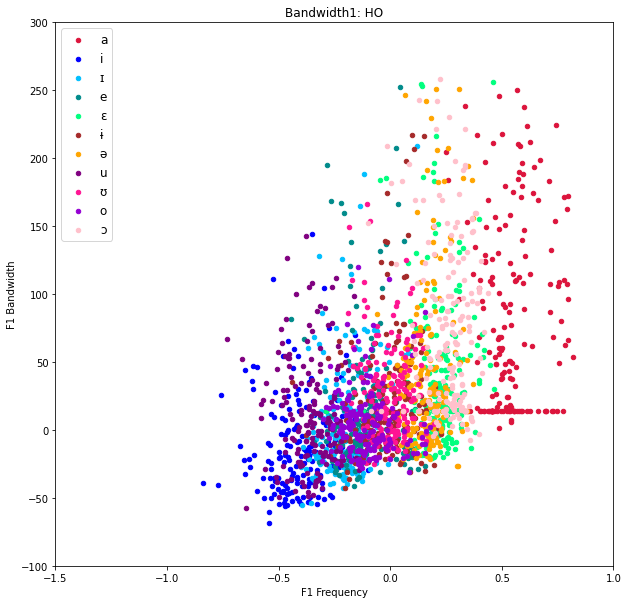

In [13]:
plt.figure(figsize=(10,10))
plt2_0 = plt.scatter(vow_0['F1'], vow_0['B1'], s = 20, marker = 'o', c = 'crimson',
label = 'a', )
plt2_1 = plt.scatter(vow_1['F1'], vow_1['B1'], s = 20, marker = 'o', c = 'blue',
label = 'i')
plt2_2 = plt.scatter(vow_2['F1'], vow_2['B1'], s = 20, marker = 'o', c = 'deepskyblue',
label = 'ɪ')
plt2_3 = plt.scatter(vow_3['F1'], vow_3['B1'], s = 20, marker = 'o', c = 'darkcyan',
label = 'e')
plt2_4 = plt.scatter(vow_4['F1'], vow_4['B1'], s = 20, marker = 'o', c = 'springgreen',
label = 'ɛ')
plt2_5 = plt.scatter(vow_5['F1'], vow_5['B1'], s = 20, marker = 'o', c = 'brown',
label = 'ɨ')
plt2_6 = plt.scatter(vow_6['F1'], vow_6['B1'], s = 20, marker = 'o', c = 'orange',
label = 'ə')
plt2_7 = plt.scatter(vow_7['F1'], vow_7['B1'], s = 20, marker = 'o', c = 'purple',
label = 'u')
plt2_8 = plt.scatter(vow_8['F1'], vow_8['B1'], s = 20, marker = 'o', c = 'deeppink',
label = 'ʊ')
plt2_9 = plt.scatter(vow_9['F1'], vow_9['B1'], s = 20, marker = 'o', c = 'darkviolet',
label = 'o')
plt2_10 = plt.scatter(vow_10['F1'], vow_10['B1'], s = 20, marker = 'o', c = 'pink',
label = 'ɔ')

plt.xlim([-1.5, 1])
plt.ylim([-100, 300])
#plt.gca().invert_xaxis()
#plt.gca().invert_yaxis()
plt.xlabel('F1 Frequency')
plt.ylabel('F1 Bandwidth')
plt.legend(fontsize=12)
plt.title('Bandwidth1: HO')
#plt.savefig('B1_front_BKS.png')
plt.show()

Теперь построим те же два графика, но только для одного информанта, например, для первого - HO.

In [14]:
vow_HO = vowels[vowels['SPKR'] == 0]
vow_YT = vowels[vowels['SPKR'] == 1]
vow_AD = vowels[vowels['SPKR'] == 2]
vow_AK = vowels[vowels['SPKR'] == 3]
vow_BO = vowels[vowels['SPKR'] == 4]
vow_MA = vowels[vowels['SPKR'] == 5]

In [15]:
vow_HO0 = vow_HO[vow_HO['Vowel'] == 0]
vow_HO1 = vow_HO[vow_HO['Vowel'] == 1]
vow_HO2 = vow_HO[vow_HO['Vowel'] == 2]
vow_HO3 = vow_HO[vow_HO['Vowel'] == 3]
vow_HO4 = vow_HO[vow_HO['Vowel'] == 4]
vow_HO5 = vow_HO[vow_HO['Vowel'] == 5]
vow_HO6 = vow_HO[vow_HO['Vowel'] == 6]
vow_HO7 = vow_HO[vow_HO['Vowel'] == 7]
vow_HO8 = vow_HO[vow_HO['Vowel'] == 8]
vow_HO9 = vow_HO[vow_HO['Vowel'] == 9]
vow_HO10 = vow_HO[vow_HO['Vowel'] == 10]

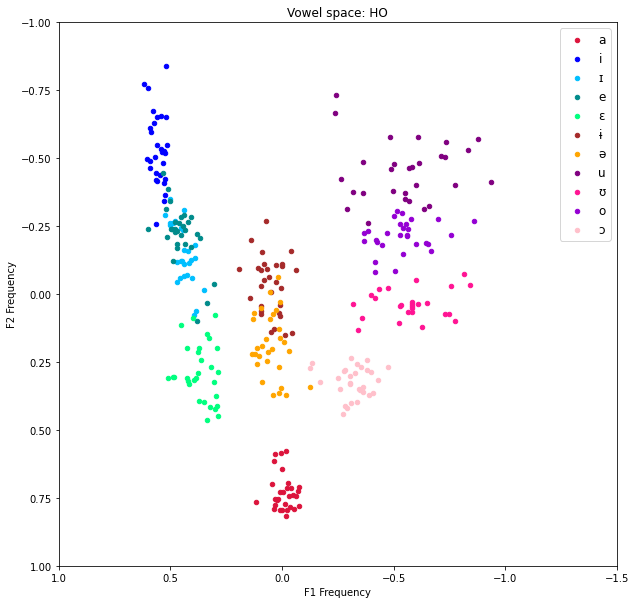

In [16]:
plt.figure(figsize=(10,10))
plt_HO0 = plt.scatter(vow_HO0['F2'], vow_HO0['F1'], s = 20, marker = 'o', c = 'crimson',
label = 'a', )
plt_HO1 = plt.scatter(vow_HO1['F2'], vow_HO1['F1'], s = 20, marker = 'o', c = 'blue',
label = 'i')
plt_HO2 = plt.scatter(vow_HO2['F2'], vow_HO2['F1'], s = 20, marker = 'o', c = 'deepskyblue',
label = 'ɪ')
plt_HO3 = plt.scatter(vow_HO3['F2'], vow_HO3['F1'], s = 20, marker = 'o', c = 'darkcyan',
label = 'e')
plt_HO4 = plt.scatter(vow_HO4['F2'], vow_HO4['F1'], s = 20, marker = 'o', c = 'springgreen',
label = 'ɛ')
plt_HO5 = plt.scatter(vow_HO5['F2'], vow_HO5['F1'], s = 20, marker = 'o', c = 'brown',
label = 'ɨ')
plt_HO6 = plt.scatter(vow_HO6['F2'], vow_HO6['F1'], s = 20, marker = 'o', c = 'orange',
label = 'ə')
plt_HO7 = plt.scatter(vow_HO7['F2'], vow_HO7['F1'], s = 20, marker = 'o', c = 'purple',
label = 'u')
plt_HO8 = plt.scatter(vow_HO8['F2'], vow_HO8['F1'], s = 20, marker = 'o', c = 'deeppink',
label = 'ʊ')
plt_HO9 = plt.scatter(vow_HO9['F2'], vow_HO9['F1'], s = 20, marker = 'o', c = 'darkviolet',
label = 'o')
plt_HO10 = plt.scatter(vow_HO10['F2'], vow_HO10['F1'], s = 20, marker = 'o', c = 'pink',
label = 'ɔ')

plt.xlim([-1.5, 1])
plt.ylim([-1, 1])
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel('F1 Frequency')
plt.ylabel('F2 Frequency')
plt.legend(fontsize=12)
plt.title('Vowel space: HO')
#plt.savefig('B1_front_BKS.png')
plt.show()

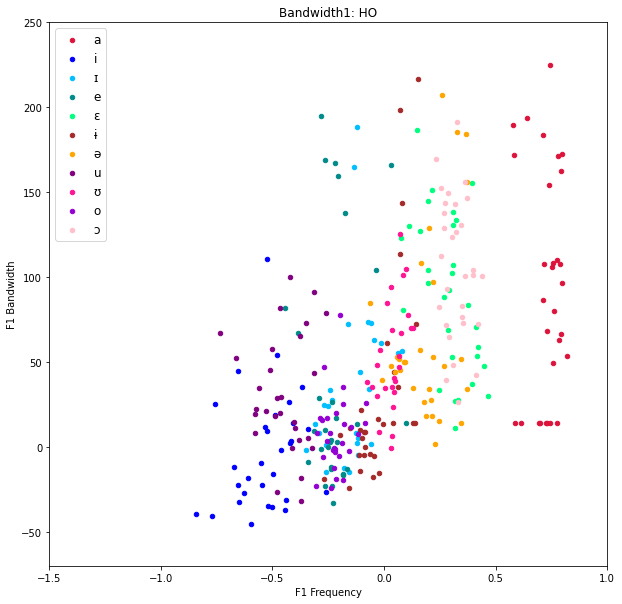

In [17]:
plt.figure(figsize=(10,10))
plt2_HO0 = plt.scatter(vow_HO0['F1'], vow_HO0['B1'], s = 20, marker = 'o', c = 'crimson',
label = 'a', )
plt2_HO1 = plt.scatter(vow_HO1['F1'], vow_HO1['B1'], s = 20, marker = 'o', c = 'blue',
label = 'i')
plt2_HO2 = plt.scatter(vow_HO2['F1'], vow_HO2['B1'], s = 20, marker = 'o', c = 'deepskyblue',
label = 'ɪ')
plt2_HO3 = plt.scatter(vow_HO3['F1'], vow_HO3['B1'], s = 20, marker = 'o', c = 'darkcyan',
label = 'e')
plt2_HO4 = plt.scatter(vow_HO4['F1'], vow_HO4['B1'], s = 20, marker = 'o', c = 'springgreen',
label = 'ɛ')
plt2_HO5 = plt.scatter(vow_HO5['F1'], vow_HO5['B1'], s = 20, marker = 'o', c = 'brown',
label = 'ɨ')
plt2_HO6 = plt.scatter(vow_HO6['F1'], vow_HO6['B1'], s = 20, marker = 'o', c = 'orange',
label = 'ə')
plt2_HO7 = plt.scatter(vow_HO7['F1'], vow_HO7['B1'], s = 20, marker = 'o', c = 'purple',
label = 'u')
plt2_HO8 = plt.scatter(vow_HO8['F1'], vow_HO8['B1'], s = 20, marker = 'o', c = 'deeppink',
label = 'ʊ')
plt2_HO9 = plt.scatter(vow_HO9['F1'], vow_HO9['B1'], s = 20, marker = 'o', c = 'darkviolet',
label = 'o')
plt2_HO10 = plt.scatter(vow_HO10['F1'], vow_HO10['B1'], s = 20, marker = 'o', c = 'pink',
label = 'ɔ')

plt.xlim([-1.5, 1])
plt.ylim([-70, 250])
#plt.gca().invert_xaxis()
#plt.gca().invert_yaxis()
plt.xlabel('F1 Frequency')
plt.ylabel('F1 Bandwidth')
plt.legend(fontsize=12)
plt.title('Bandwidth1: HO')
#plt.savefig('B1_front_BKS.png')
plt.show()

Судя по графикам, различия между информантами не очень существенны, однако мы можем ожидать, что модель будем обладать большей предсказательной силой, если она будет учитывать информанта в качестве еще одной переменной.

*Нормализация данных*

А. Нормализация значений числовых переменных

In [18]:
num_values = vowels[['F1', 'F2', 'Spectral Slope', 'B1']]
st = StandardScaler()
num_values = st.fit_transform(num_values)
num_values_df = pd.DataFrame(num_values, columns = ['F1', 'F2', 'Spectral Slope', 'B1'])
num_values_df.head()

,F1,F2,Spectral Slope,B1
0,-1.995048,1.080444,-0.231951,-1.151640
1,-1.869173,1.096953,-0.464496,-1.027362
2,-1.353086,1.096953,0.264329,-0.770737
3,-1.880712,1.120539,-0.698894,-1.149120
4,-1.875117,1.161421,-0.640612,-0.960066


Б. Нормализация значений категориальных переменных: независимой переменной, кодирующей информанта, или спикера, и зависимой переменной, кодирующей тип гласного.

In [19]:
ohe = OneHotEncoder(sparse = False)
new_ohe_features = ohe.fit_transform(vowels.SPKR.values.reshape(-1, 1))
tmp = pd.DataFrame(new_ohe_features, columns = ['SPKR=' + str(i) for i in range(new_ohe_features.shape[1])])
vowels3 = pd.concat([num_values_df, tmp], axis=1)
vowels4 = pd.concat([vowels3, vowels.Vowel], axis=1)
vowels4.head()

,F1,F2,Spectral Slope,B1,SPKR=0,SPKR=1,SPKR=2,SPKR=3,SPKR=4,SPKR=5,Vowel
0,-1.995048,1.080444,-0.231951,-1.151640,0.0,1.0,0.0,0.0,0.0,0.0,1
1,-1.869173,1.096953,-0.464496,-1.027362,0.0,1.0,0.0,0.0,0.0,0.0,1
2,-1.353086,1.096953,0.264329,-0.770737,0.0,1.0,0.0,0.0,0.0,0.0,1
3,-1.880712,1.120539,-0.698894,-1.149120,0.0,1.0,0.0,0.0,0.0,0.0,1
4,-1.875117,1.161421,-0.640612,-0.960066,0.0,1.0,0.0,0.0,0.0,0.0,1


In [20]:
new_ohe_features2 = ohe.fit_transform(vowels4.Vowel.values.reshape(-1, 1))
tmp2 = pd.DataFrame(new_ohe_features2, columns = ['Vowel=' + str(i) for i in range(new_ohe_features2.shape[1])])
vowels5 = pd.concat([vowels4, tmp2], axis=1)
vowels5.head()

,F1,F2,Spectral Slope,B1,SPKR=0,SPKR=1,SPKR=2,SPKR=3,SPKR=4,SPKR=5,...,Vowel=1,Vowel=2,Vowel=3,Vowel=4,Vowel=5,Vowel=6,Vowel=7,Vowel=8,Vowel=9,Vowel=10
0,-1.995048,1.080444,-0.231951,-1.151640,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.869173,1.096953,-0.464496,-1.027362,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.353086,1.096953,0.264329,-0.770737,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.880712,1.120539,-0.698894,-1.149120,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.875117,1.161421,-0.640612,-0.960066,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
vowels5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955 entries, 0 to 1954
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   F1              1955 non-null   float64
 1   F2              1955 non-null   float64
 2   Spectral Slope  1955 non-null   float64
 3   B1              1955 non-null   float64
 4   SPKR=0          1955 non-null   float64
 5   SPKR=1          1955 non-null   float64
 6   SPKR=2          1955 non-null   float64
 7   SPKR=3          1955 non-null   float64
 8   SPKR=4          1955 non-null   float64
 9   SPKR=5          1955 non-null   float64
 10  Vowel           1955 non-null   int64  
 11  Vowel=0         1955 non-null   float64
 12  Vowel=1         1955 non-null   float64
 13  Vowel=2         1955 non-null   float64
 14  Vowel=3         1955 non-null   float64
 15  Vowel=4         1955 non-null   float64
 16  Vowel=5         1955 non-null   float64
 17  Vowel=6         1955 non-null   f

*Разбивка массива данных на обучающую и тестовую выборки*

In [21]:
x = vowels5[['F1', 'F2', 'Spectral Slope', 'B1', 'SPKR=0', 'SPKR=1', 'SPKR=2', 'SPKR=3', 'SPKR=4', 'SPKR=5']]
y = vowels5[['Vowel', 'Vowel=0', 'Vowel=1', 'Vowel=2', 'Vowel=3', 'Vowel=4', 'Vowel=5', 'Vowel=6', 'Vowel=7', 'Vowel=8', 'Vowel=9', 'Vowel=10']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [23]:
y_train_new = y_train.drop(columns=['Vowel'], axis=1)
y_train_new.head()

,Vowel=0,Vowel=1,Vowel=2,Vowel=3,Vowel=4,Vowel=5,Vowel=6,Vowel=7,Vowel=8,Vowel=9,Vowel=10
1856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
153,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [24]:
y_test_new = y_test.drop(columns=['Vowel'], axis=1)
y_test_new.head()

,Vowel=0,Vowel=1,Vowel=2,Vowel=3,Vowel=4,Vowel=5,Vowel=6,Vowel=7,Vowel=8,Vowel=9,Vowel=10
1493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1100,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Созданные массивы значений х включают информанта в качестве независимой переменной. Создадим второй вариант обучающей и тестовой выборок, где параметр информанта не будет учитываться.

In [25]:
x_train_part = x_train.drop(columns=['SPKR=0', 'SPKR=1', 'SPKR=2', 'SPKR=3', 'SPKR=4', 'SPKR=5'], axis=1)
x_train_part.head()

,F1,F2,Spectral Slope,B1
1856,0.142377,-1.391600,-0.443699,-0.113825
285,1.118257,-0.335485,-1.296601,0.947253
153,0.575946,0.396458,-0.191062,-0.858578
1555,0.316154,-0.827115,-1.424727,-0.662962
1821,-1.627214,-1.489349,-0.897690,-0.170497


In [26]:
x_test_part = x_test.drop(columns=['SPKR=0', 'SPKR=1', 'SPKR=2', 'SPKR=3', 'SPKR=4', 'SPKR=5'], axis=1)
x_test_part.head()

,F1,F2,Spectral Slope,B1
1493,-1.401688,-1.151026,1.555038,0.074608
942,0.515107,-0.933775,-0.424070,2.445867
246,-0.421263,-1.094158,-1.329121,-0.609144
946,0.520002,-1.373517,-1.013237,1.416301
1100,-0.147135,0.295826,-0.235990,1.642726


4) Моделирование

В этой работе мы попробуем реализовать четыре модели, опираясь на два параметра: 

а) количество скрытых слоев (1 vs. 2);

б) наличие vs. отсутствие независимой переменной, кодирующей информанта.

Получаются следующие типы моделей:

Модель 1а: 1 скрытый слой, без спикера;

Модель 1b: 2 скрытых слоя, без спикера;

Модель 2а: 1 скрытый слой, со спикером;

Модель 2b: 2 скрытых слоя, со спикером.

Модель 1а

Пусть число узлов во входном слое будет 10. В скрытом слое трехслойной модели число входных узлов может быть вычислено по следующей формуле:

image004.gif

где k – число нейронов в скрытом слое,

n – число нейронов во входном слое,

m –  число нейронов в выходном слое.

В нашем случае эта формула дает число 10.

In [101]:
model1a = Sequential()

In [102]:
model1a.add(Dense(10, input_dim=4, activation='relu'))
model1a.add(Dense(10, activation='relu'))
model1a.add(Dense(11, activation='softmax'))
model1a.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [103]:
model1a.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 10)                50        
                                                                 
 dense_36 (Dense)            (None, 10)                110       
                                                                 
 dense_37 (Dense)            (None, 11)                121       
                                                                 
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________


In [104]:
model1a.fit(x_train_part, y_train_new, epochs=50)

Epoch 1/50
49/49 [==============================] - 2s 14ms/step - loss: 2.3804 - accuracy: 0.1055
Epoch 2/50
49/49 [==============================] - 1s 1ms/step - loss: 2.2420 - accuracy: 0.2251
Epoch 3/50
49/49 [==============================] - 0s 1ms/step - loss: 2.0981 - accuracy: 0.2864
Epoch 4/50
49/49 [==============================] - 0s 2ms/step - loss: 1.9397 - accuracy: 0.3306
Epoch 5/50
49/49 [==============================] - 0s 2ms/step - loss: 1.7865 - accuracy: 0.3574
Epoch 6/50
49/49 [==============================] - 0s 1ms/step - loss: 1.6485 - accuracy: 0.3760
Epoch 7/50
49/49 [==============================] - 0s 2ms/step - loss: 1.5284 - accuracy: 0.4111
Epoch 8/50
49/49 [==============================] - 0s 1ms/step - loss: 1.4221 - accuracy: 0.4527
Epoch 9/50
49/49 [==============================] - 0s 1ms/step - loss: 1.3265 - accuracy: 0.4981
Epoch 10/50
49/49 [==============================] - 0s 2ms/step - loss: 1.2400 - accuracy: 0.5345
Epoch 11/50
49/49 

In [105]:
evaluate1a = model1a.evaluate(x_test_part, y_test_new)
accuracy1a = evaluate1a[1]
print(accuracy1a)

13/13 [==============================] - 1s 77ms/step - loss: 0.5180 - accuracy: 0.7954
0.7953964471817017


In [106]:
prediction1a = model1a.predict(x_test_part)

13/13 [==============================] - 2s 201ms/step


Модель 1b

Пусть число узлов во входном слое будет по-прежнему 10. Добавим еще один скрытый слой. Тогда число узлов в скрытых слоях будет вычисляться по следующим формулам:

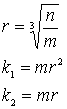

где  

k1 - число нейронов в первом скрытом слое,

k2 - число нейронов во втором скрытом слое,

n – число нейронов во входном слое;

m –  число нейронов в выходном слое.

В нашем случае к1 = 10, к2 = 11.

In [34]:
model1b = Sequential()

In [35]:
model1b.add(Dense(10, input_dim=4, activation='relu'))
model1b.add(Dense(10, activation='relu'))
model1b.add(Dense(11, activation='relu'))
model1b.add(Dense(11, activation='softmax'))
model1b.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
model1b.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                50        
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 11)                121       
                                                                 
 dense_6 (Dense)             (None, 11)                132       
                                                                 
Total params: 413
Trainable params: 413
Non-trainable params: 0
_________________________________________________________________


In [37]:
model1b.fit(x_train_part, y_train_new, epochs=50)

Epoch 1/50
49/49 [==============================] - 3s 35ms/step - loss: 2.4070 - accuracy: 0.0543
Epoch 2/50
49/49 [==============================] - 2s 41ms/step - loss: 2.3320 - accuracy: 0.1471
Epoch 3/50
49/49 [==============================] - 2s 39ms/step - loss: 2.2140 - accuracy: 0.2359
Epoch 4/50
49/49 [==============================] - 0s 1ms/step - loss: 2.0050 - accuracy: 0.2762
Epoch 5/50
49/49 [==============================] - 1s 23ms/step - loss: 1.7226 - accuracy: 0.3536
Epoch 6/50
49/49 [==============================] - 0s 1ms/step - loss: 1.4450 - accuracy: 0.4162
Epoch 7/50
49/49 [==============================] - 0s 1ms/step - loss: 1.2395 - accuracy: 0.5102
Epoch 8/50
49/49 [==============================] - 0s 1ms/step - loss: 1.0891 - accuracy: 0.5601
Epoch 9/50
49/49 [==============================] - 0s 1ms/step - loss: 0.9778 - accuracy: 0.6176
Epoch 10/50
49/49 [==============================] - 0s 1ms/step - loss: 0.8955 - accuracy: 0.6560
Epoch 11/50
49/

In [55]:
evaluate1b = model1b.evaluate(x_test_part, y_test_new)
accuracy1b = evaluate1b[1]
print(accuracy1b)

13/13 [==============================] - 1s 42ms/step - loss: 0.5015 - accuracy: 0.7928
0.7928388714790344


In [40]:
prediction1b = model1b.predict(x_test_part)


13/13 [==============================] - 1s 47ms/step


Модель 2а



In [41]:
model2a = Sequential()

In [42]:
model2a.add(Dense(10, input_dim=10, activation='relu'))
model2a.add(Dense(10, activation='relu'))
model2a.add(Dense(11, activation='softmax'))
model2a.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
model2a.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 10)                110       
                                                                 
 dense_9 (Dense)             (None, 11)                121       
                                                                 
Total params: 341
Trainable params: 341
Non-trainable params: 0
_________________________________________________________________


In [44]:
model2a.fit(x_train, y_train_new, epochs=50)

Epoch 1/50
49/49 [==============================] - 1s 14ms/step - loss: 2.5104 - accuracy: 0.0633
Epoch 2/50
49/49 [==============================] - 2s 34ms/step - loss: 2.4003 - accuracy: 0.1004
Epoch 3/50
49/49 [==============================] - 0s 1ms/step - loss: 2.3155 - accuracy: 0.1394
Epoch 4/50
49/49 [==============================] - 0s 1ms/step - loss: 2.2208 - accuracy: 0.2225
Epoch 5/50
49/49 [==============================] - 0s 1ms/step - loss: 2.1232 - accuracy: 0.2545
Epoch 6/50
49/49 [==============================] - 0s 2ms/step - loss: 2.0240 - accuracy: 0.3031
Epoch 7/50
49/49 [==============================] - 0s 1ms/step - loss: 1.9086 - accuracy: 0.3529
Epoch 8/50
49/49 [==============================] - 0s 2ms/step - loss: 1.7678 - accuracy: 0.3772
Epoch 9/50
49/49 [==============================] - 0s 1ms/step - loss: 1.6146 - accuracy: 0.4066
Epoch 10/50
49/49 [==============================] - 1s 22ms/step - loss: 1.4727 - accuracy: 0.4482
Epoch 11/50
49/4

In [56]:
evaluate2a = model2a.evaluate(x_test, y_test_new)
accuracy2a = evaluate2a[1]
print(accuracy2a)

13/13 [==============================] - 0s 13ms/step - loss: 0.4912 - accuracy: 0.7980
0.7979539632797241


In [46]:
prediction2a = model2a.predict(x_test)

13/13 [==============================] - 0s 31ms/step


Модель 2b

In [47]:
model2b = Sequential()

In [48]:
model2b.add(Dense(10, input_dim=10, activation='relu'))
model2b.add(Dense(10, activation='relu'))
model2b.add(Dense(11, activation='relu'))
model2b.add(Dense(11, activation='softmax'))
model2b.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
model2b.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                110       
                                                                 
 dense_11 (Dense)            (None, 10)                110       
                                                                 
 dense_12 (Dense)            (None, 11)                121       
                                                                 
 dense_13 (Dense)            (None, 11)                132       
                                                                 
Total params: 473
Trainable params: 473
Non-trainable params: 0
_________________________________________________________________


In [50]:
model2b.fit(x_train, y_train_new, epochs=50)

Epoch 1/50
49/49 [==============================] - 1s 1ms/step - loss: 2.3723 - accuracy: 0.1509
Epoch 2/50
49/49 [==============================] - 0s 2ms/step - loss: 2.2783 - accuracy: 0.2020
Epoch 3/50
49/49 [==============================] - 0s 2ms/step - loss: 2.1311 - accuracy: 0.2474
Epoch 4/50
49/49 [==============================] - 0s 2ms/step - loss: 1.9296 - accuracy: 0.2711
Epoch 5/50
49/49 [==============================] - 0s 1ms/step - loss: 1.6992 - accuracy: 0.3529
Epoch 6/50
49/49 [==============================] - 0s 2ms/step - loss: 1.4793 - accuracy: 0.4674
Epoch 7/50
49/49 [==============================] - 0s 2ms/step - loss: 1.2861 - accuracy: 0.5518
Epoch 8/50
49/49 [==============================] - 0s 2ms/step - loss: 1.1197 - accuracy: 0.5863
Epoch 9/50
49/49 [==============================] - 0s 1ms/step - loss: 0.9856 - accuracy: 0.6439
Epoch 10/50
49/49 [==============================] - 0s 1ms/step - loss: 0.8822 - accuracy: 0.6867
Epoch 11/50
49/49 [

In [57]:
evaluate2b = model2b.evaluate(x_test, y_test_new)
accuracy2b = evaluate2b[1]
print(accuracy2b)

13/13 [==============================] - 0s 35ms/step - loss: 0.5012 - accuracy: 0.7749
0.7749360799789429


In [52]:
prediction2b = model2b.predict(x_test)

13/13 [==============================] - 0s 1ms/step


5) Оценка работы моделей

В качестве метрики эффективности работы моделей мы будем использовать accuracy, или долю правильных ответов.

Выведем таблицу с метриками всех четырех моделей.

In [107]:
model = ['model 1a', 'model 1b', 'model 2a', 'model 2b']
accuracy = [accuracy1a, accuracy1b, accuracy2a, accuracy2b]
metrics = pd.DataFrame([accuracy], columns = model)
metrics.head()

,model 1a,model 1b,model 2a,model 2b
0,0.795396,0.792839,0.797954,0.774936


Выведем таблицу с тестовой выборкой y значений и посмотрим на ошибки разных моделей в предсказании категории гласного.

In [108]:
pred1a = []
pred1b = []
pred2a = []
pred2b = []
for p in range(len(prediction1a)):
  pred1a.append(np.argmax(prediction1a[p]))
for p in range(len(prediction1b)):
  pred1b.append(np.argmax(prediction1b[p]))  
for p in range(len(prediction2a)):
  pred2a.append(np.argmax(prediction2a[p]))
for p in range(len(prediction2b)):
  pred2b.append(np.argmax(prediction2b[p]))

In [109]:
y_test_comp = y_test.copy()
y_test_comp['model1a prediction'] = pred1a
y_test_comp['model1b prediction'] = pred1b
y_test_comp['model2a prediction'] = pred2a
y_test_comp['model2b prediction'] = pred2b
y_test_comp = y_test_comp.drop(['Vowel=0', 'Vowel=1', 'Vowel=2', 'Vowel=3', 'Vowel=4', 'Vowel=5', 'Vowel=6', 'Vowel=7', 'Vowel=8', 'Vowel=9', 'Vowel=10'], axis=1)
y_test_comp.head()

,Vowel,model1a prediction,model1b prediction,model2a prediction,model2b prediction
1493,7,7,7,7,7
942,10,10,10,10,10
246,9,9,9,9,8
946,10,10,10,10,10
1100,5,5,5,5,5


Отметим ошибочные значения восклицательным знаком.

In [110]:
for i in range(391):
  d = y_test_comp.iloc[i, 1]
  if d != y_test_comp.iloc[i, 0]:
      d = str(y_test_comp.iloc[i, 1])
      d = d + ' !'
      y_test_comp.iloc[i, 1] = d

for i in range(391):
  d = y_test_comp.iloc[i, 2]
  if d != y_test_comp.iloc[i, 0]:
      d = str(y_test_comp.iloc[i, 2])
      d = d + ' !'
      y_test_comp.iloc[i, 2] = d

for i in range(391):
  d = y_test_comp.iloc[i, 3]
  if d != y_test_comp.iloc[i, 0]:
      d = str(y_test_comp.iloc[i, 3])
      d = d + ' !'
      y_test_comp.iloc[i, 3] = d

for i in range(391):
  d = y_test_comp.iloc[i, 4]
  if d != y_test_comp.iloc[i, 0]:
      d = str(y_test_comp.iloc[i, 4])
      d = d + ' !'
      y_test_comp.iloc[i, 4] = d
      
y_test_comp.head(20)

,Vowel,model1a prediction,model1b prediction,model2a prediction,model2b prediction
1493,7,7,7,7,7
942,10,10,10,10,10
246,9,9,9,9,8 !
946,10,10,10,10,10
1100,5,5,5,5,5
1690,2,3 !,3 !,3 !,3 !
1502,7,7,7,7,7
215,8,9 !,8,9 !,9 !
1336,1,1,1,1,1
1358,2,3 !,3 !,3 !,3 !


Итак, мы видим, что доля правильных ответов примерно одинакова для всех четырех моделей, при этом введение информанта в качестве независимой переменной также не повышает эффективности модели. 

Из последней таблицы видно, что ошибки моделей могут быть сходными, но могут и различаться. Требуется более внимательное изучение результатов предсказаний, чтобы понять, является ли доля правильных ответов ключевой метрикой для данной задачи.

Эксперименты с изменением числа узлов также не поменяли существенно полученных результатов. 

Эффективность моделей является довольно приличной, но в то же время повысить ее пока не удалось. Результаты классификации необходимо дополнять при работе над языком морфонологическим анализом.



6) Проект будет интересен довольно узкому кругу исследователей, но в качестве удобства файл проекта может быть выложен на git-hub.